<a href="https://colab.research.google.com/github/sal0m/HSE_ML_hw2/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

`Ваш ответ здесь`



## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import *

In [4]:
x = sp.Symbol('x')

In [5]:
def f(x):
  return x * sin(5 * x) + 0.1 * x**2

In [6]:
df_x = sp.diff(f(x))
df_x

5*x*cos(5*x) + 0.2*x + sin(5*x)

In [7]:
# Функция и её производная
def f(x):
  return x * np.sin(5 * x) + 0.1 * x ** 2

def df(x):
    return 5 * x * np.cos(5 * x) + 0.2 * x + np.sin(5 * x)

# Градиентный спуск
def gradient_descent(f, df, x0, eta, max_iter=1000, tol=1e-6):
    x_curr = x0
    path = [x_curr]

    for i in range(max_iter):
      x_new = x_curr - eta * df(x_curr)
      path.append(x_new)

      if abs(x_new - x_curr) < tol:
        return x_curr, path

      x_curr = x_new

    return x, path

# Поиск экстремумов
def find_points(f, df, x0, eta=0.001, max_iter=1000, tol=1e-6):

    min_x, min_path = gradient_descent(f, df, x0, eta, max_iter, tol)
    min_val = f(min_x)

    max_x, max_path = gradient_descent(f, lambda x: -df(x), x0, eta, max_iter, tol)
    max_val = f(max_x)

    return {"min": (min_x, min_val, min_path), "max": (max_x, max_val, max_path)}

In [9]:
x0_values = [0, 0.5, 1]
for x0 in x0_values:
  result = find_points(f, df, x0)
  print(f"Стартовая точка: {x0}")
  print(f"Минимум: x = {result['min'][0]:.4f}, f(x) = {result['min'][1]:.4f}")
  print(f"Максимум: x = {result['max'][0]:.4f}, f(x) = {result['max'][1]:.4f}")
  print("-" * 40)

Стартовая точка: 0
Минимум: x = 0.0000, f(x) = 0.0000
Максимум: x = 0.0000, f(x) = 0.0000
----------------------------------------
Стартовая точка: 0.5
Минимум: x = 0.9751, f(x) = -0.8671
Максимум: x = 0.4119, f(x) = 0.3807
----------------------------------------
Стартовая точка: 1
Минимум: x = 0.9751, f(x) = -0.8671
Максимум: x = 1.6035, f(x) = 1.8392
----------------------------------------


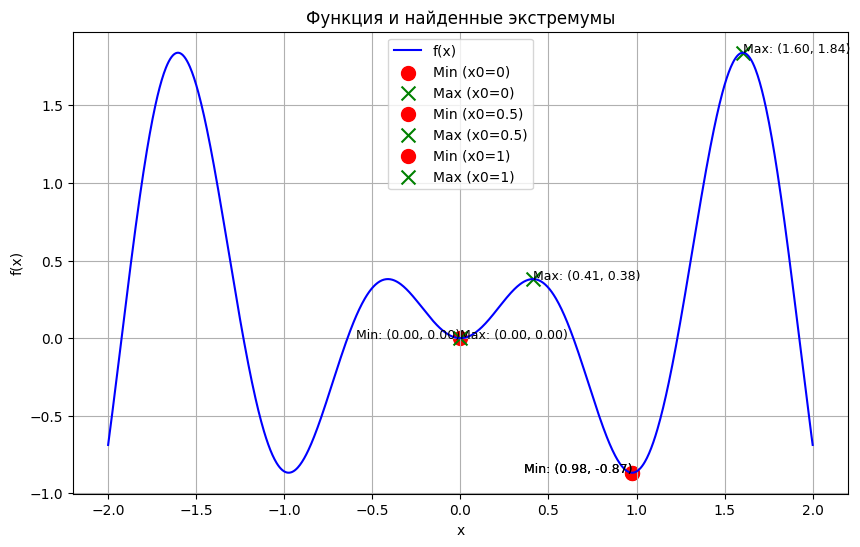

In [11]:
# Визуализация функции и экстремумов
def plot_function_and_extrema(f, df, x0_values, eta=0.001):
    x = np.linspace(-2, 2, 1000)
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label="f(x)", color="blue")

    for x0 in x0_values:
        result = find_points(f, df, x0, eta)
        min_x, min_val = result["min"][:2]
        max_x, max_val = result["max"][:2]

        plt.scatter(min_x, min_val, color="red", marker="o", s=100, label=f"Min (x0={x0})")
        plt.text(min_x, min_val, f"Min: ({min_x:.2f}, {min_val:.2f})", fontsize=9, ha='right')

        plt.scatter(max_x, max_val, color="green", marker="x", s=100, label=f"Max (x0={x0})")
        plt.text(max_x, max_val, f"Max: ({max_x:.2f}, {max_val:.2f})", fontsize=9, ha='left')

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Функция и найденные экстремумы")
    plt.legend()
    plt.grid(True)
    plt.show()

x0_values = [0, 0.5, 1]

plot_function_and_extrema(f, df, x0_values)

## Выводы:

1.   Результаты зависят от выбора начальной точки, тк у функции есть несколько локальных минимумов и максимумов (наглядно видна проблема градиентного спуска)
2.   В точке x0 = 0 найденные экстремумы совпали, тк функция симметрична вокруг этой точки (она является и локальным минимумом и локальным максимумом) + мы стартуем из точки, где производная уже = 0, градиентному спуску некуда двигаться



## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [12]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [13]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

In [28]:
import random

def stochastic_gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):

        j = random.randint(0, len(X) - 1)

        params = params - learning_rate * 2 * X[j].T * ((X[j] @ params) - y[j])

        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [15]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [18]:
def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ w

In [16]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000, #number of samples
                          n_features=10, #number of features
                          n_informative=8, #number of useful features
                          noise=100, #bias and standard deviation of the guassian noise
                          coef=True, #true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

### 1. Обучение по точной аналитической формуле:

In [19]:
w_ols = ols_solution(X, y)

In [20]:
y_pred_ols = prediction(X, w_ols)

In [21]:
from sklearn.metrics import r2_score

In [23]:
r2_score_ols = r2_score(y, y_pred_ols)
r2_score_ols

0.7508187585657884

### 2. Обучение при помощи градиентного спуска

In [24]:
track_grad, w_grad = gradient_descent(X, y, 0.01, 10_000)

In [25]:
y_pred_grad = prediction(X, w_grad)

In [26]:
r2_score_grad = r2_score(y, y_pred_grad)
r2_score_grad

0.7554626185750483

### 2. Обучение при помощи стохастического градиентного спуска

In [29]:
track_stoch_grad, w_stoch_grad = stochastic_gradient_descent(X, y, 0.01, 10_000)

In [30]:
y_stoch_grad = prediction(X, w_stoch_grad)

In [31]:
r2_stoch_grad = r2_score(y, y_stoch_grad)
r2_stoch_grad

0.7263500156652862

### Замеряем время

In [32]:
%%time
ols_solution(X, y)

CPU times: user 20.3 ms, sys: 10.1 ms, total: 30.4 ms
Wall time: 23.8 ms


array([-0.58327632, 56.78684635, 33.49844357, -0.23553835, 39.65999222,
       -0.12281177, 49.13032063, 16.43448304, 63.42260049, 79.20386231,
       42.4712069 , 40.5520015 ])

In [33]:
%%time
gradient_descent(X, y, 0.01, 10_000)

CPU times: user 35.2 s, sys: 8.63 s, total: 43.9 s
Wall time: 28.9 s


(array([[37774.64816408],
        [35760.72322256],
        [33932.87385961],
        ...,
        [ 9982.20353127],
        [ 9982.20353127],
        [ 9982.20353127]]),
 array([-0.6766551 , 56.82455793, 33.48291813, -0.24065452, 39.64529367,
        -0.13585617, 49.12295947, 13.86198555, 42.83767631, 79.20386231,
        42.4712069 , 55.78238345]))

In [34]:
%%time
stochastic_gradient_descent(X, y, 0.01, 10_000)

CPU times: user 13.1 s, sys: 3.99 s, total: 17.1 s
Wall time: 12.1 s


(array([[38664.46069516],
        [39857.78768568],
        [38134.36232139],
        ...,
        [10833.02322266],
        [10832.32337895],
        [10524.15671345]]),
 array([ 10.39993443,  53.13199658,  30.85233316, -11.6799481 ,
         46.37487334,  -8.96271218,  42.13948603,  11.84898314,
         43.85644649,  74.0750245 ,  50.33555648,  54.85150105]))

### Ответы на вопросы:

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

да, все методы справились

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

самый долгий - градиентный спуск, самый быстрый - аналитический

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

градиентный спуск........

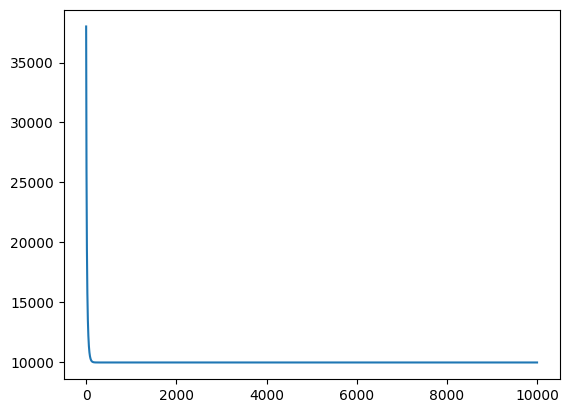

In [35]:
plt.plot(track_grad)

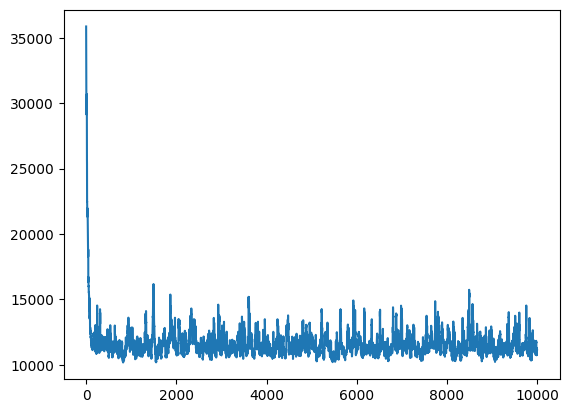

In [36]:
plt.plot(track_stoch_grad)

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [37]:
def compute_cost(X, y, params, reg_lambda):
    m = len(y)
    predictions = X @ params
    cost = (1 / m) * np.sum((predictions - y) ** 2)

    l2_penalty = reg_lambda * np.sum(params[1:] ** 2)
    return cost + l2_penalty

def stochastic_gradient_descent(X, y, learning_rate, iterations, reg_lambda):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):

        j = random.randint(0, len(X) - 1)

        gradient = 2 * X[j].T * ((X[j] @ params) - y[j]) + reg_lambda * params
        gradient[0] -= reg_lambda * params[0]  # на свободный член регуляризация не распространяется
        params = params - learning_rate * gradient

        cost_track[i] = compute_cost(X, y, params, reg_lambda)

    return cost_track, params

Регуляризация λ = 0.1 | R² = 0.7237
Регуляризация λ = 0.2 | R² = 0.6882
Регуляризация λ = 0.3 | R² = 0.7270
Регуляризация λ = 0.4 | R² = 0.6703
Регуляризация λ = 0.5 | R² = 0.6791
Регуляризация λ = 0.6 | R² = 0.6911
Регуляризация λ = 0.7 | R² = 0.6736
Регуляризация λ = 0.8 | R² = 0.6747
Регуляризация λ = 0.9 | R² = 0.7096
Регуляризация λ = 1.0 | R² = 0.6863


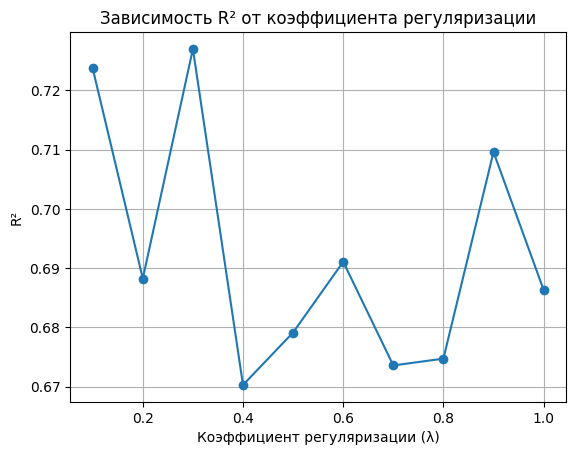

In [38]:
learning_rate = 0.01
iterations = 1000
lambdas = np.arange(0.1, 1.1, 0.1)

r2_scores = []

for reg_lambda in lambdas:
    cost_track, w = stochastic_gradient_descent(X, y, learning_rate, iterations, reg_lambda)
    y_pred = prediction(X, w)
    r2 = r2_score(y, y_pred)
    r2_scores.append(r2)
    print(f"Регуляризация λ = {reg_lambda:.1f} | R² = {r2:.4f}")

# Визуализация R² для разных λ
plt.plot(lambdas, r2_scores, marker='o')
plt.xlabel("Коэффициент регуляризации (λ)")
plt.ylabel("R²")
plt.title("Зависимость R² от коэффициента регуляризации")
plt.grid(True)
plt.show()

Лучшее значение метрики R² получили при λ = 0.3. При малых значениях модель склонна к переобучению (большие веса не штрафуются), при больших - к недообучению (слишком сильные ограничения на веса)

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [41]:
def compute_cost(X, y, params):
    m = len(y)
    predictions = X @ params
    cost = (1 / m) * np.sum((predictions - y) ** 2)
    return cost

In [42]:
def modified_grad_descent(X, y, learning_rate, iterations, epsilon=1e-8):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    G = np.zeros_like(params)

    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):

        j = random.randint(0, len(X) - 1)

        gradient = 2 * X[j].T * ((X[j] @ params) - y[j])

        G += gradient ** 2

        params = params - learning_rate * gradient / (np.sqrt(G) + epsilon)

        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?



1.   вычислительная сложность (нужно вычислять и хранить матрицу вторых производных)
2.   квадратичная сложность при работе с матрицей вторых проихводных
3.   не всегда легко найти вторую производную (иногда ее вообще нельзя найти)
4.   если функция нехорошая, методы второго порядка могут быть чувствительны к шуму



## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)

Кот Яны